# Численное нахождение корней уравнения

In [411]:
import matplotlib.pyplot as plt
import numpy as np

Для численного нахождения корня уравнения необходимо начальное приближение, то есть такой отрезок $[a, b]$, в котором будет ровно 1 корень.

Как правило, этот отрезок находят путем численного приближенного построения графика.

In [412]:
# Функция, задающая уравнения вида f(x) = 0
def f(x):
    return 5 * np.sin(x) + x - 3

In [413]:
# Готовим данные для численного построения графика
l, r, delta = -1, 5, 0.01 # <-- Задайте левую, правую границы и точность построения
X = np.linspace(l, r, int(1/delta))
Y = f(X)
Y0 = 0 * X

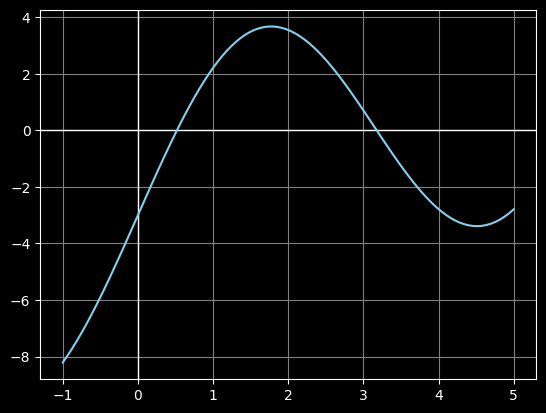

In [414]:
# Построение графика
# Оси координат
plt.axhline(0, color='white', linewidth=1)
plt.axvline(0, color='white', linewidth=1)

plt.plot(X, Y, color='skyblue', zorder=5) # График
plt.grid(True, color='gray')
plt.show()

In [415]:
a, b = [-1, 5] # <-- Задайте первое приближение
epsilon = 0.01 # <-- Задайте точность
max_iter = 25 # <-- Задайте максимальное число итераций

## Метод дихтомии(деления отрезка пополам)

**Суть метода:**

1. Вычисляем середину отрезка

2. Выбираем отрезок для которого $f(x_{границы}) \cdot f(x_{середины}) < 0$
   
3. Рассматриваем этот отрезок в качестве нового приближения

4. Повторяем пока не достигли нужной точности

**Плюсы:**

1. Абсолютно устойчив(то есть всегда сходится к решению при условии, что $f(x_{a}) \cdot f(x_{b}) < 0$)

**Минусы:**

1. Требуется много итераций

In [416]:
# Задаем границы и центр
l, m, r = a, (a + b) / 2, b

In [417]:
# Основной цикл
iter = 0
while ((r - l) > epsilon) and (iter < max_iter): # Альтернативно можно использовать условие abs(f(m)) > epsilon
    # Выбор подходящей половины отрезка
    if f(l) * f(m) < 0:
        r = m
    else:
        l = m
    # Перерассчет середины
    m = (l + r) / 2
    iter += 1

if iter == max_iter:
    print("Превышено максимальное число итераций")
else:
    print("Число итераций: ", iter)

Число итераций:  10


Корень функции: 
x =  0.5205078125 
Значение функции в этой точке:  0.00711162842929447


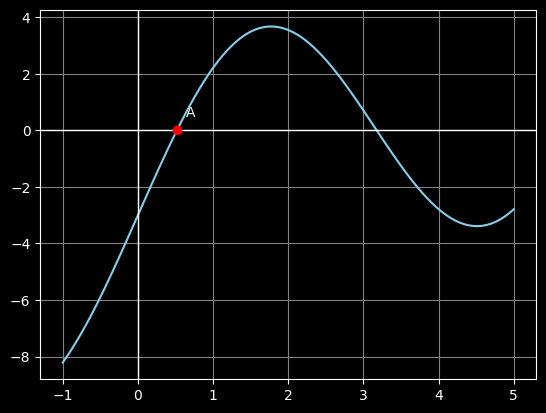

In [418]:
# Вывод полученного решения
print("Корень функции: \nx = ", m, "\nЗначение функции в этой точке: ", f(m))
# Построение графика с отмеченым решением
plt.plot(X, Y, color='skyblue') # График
# Оси координат
plt.axhline(0, color='white', linewidth=1)
plt.axvline(0, color='white', linewidth=1)

plt.scatter(m, 0, color='red', zorder=5) # Точка
plt.annotate('A', (m, 0), textcoords="offset points", xytext=(10,10), ha='center', zorder=5)
plt.grid(True, color='gray')
plt.show()

## Метод хорд

*Является модификацией метода дихтомии*

**Суть метода:**

1. Вычисляем точку $m = a - (b - a) \cdot \dfrac{f(a)}  {f(b) - f(a)}$

2. Выбираем отрезок для которого $f(x_{границы}) \cdot f(x_{m}) < 0$
   
3. Рассматриваем этот отрезок в качестве нового приближения 

4. Повторяем пока не достигли нужной точности

**Плюсы:**

1. Быстрее сходится к искомой точке

**Минусы:**

1. Сложнее в реализации

In [419]:
# Задаем границы и точку разделитель
l, r = a, b
m = l - (r - l) * f(l) / (f(r) - f(l))

In [420]:
# Основной цикл
iter = 0
while ((r - l) > epsilon) and (iter < max_iter): # Альтернативно можно использовать условие abs(f(m)) > epsilon
    # Выбор подходящей половины отрезка
    if f(l) * f(m) < 0:
        r = m
    else:
        l = m
    # Перерассчет точки разделителя
    try:
        m = l - (r - l) * f(l) / (f(r) - f(l))
    except:
        print("Метод не применим к данной функции")
        break

    iter += 1

if iter == max_iter:
    print("Превышено максимальное число итераций")
else:
    print("Число итераций: ", iter)

Число итераций:  15


Корень функции: 
x =  0.5191759192721579 
Значение функции в этой точке:  0.0


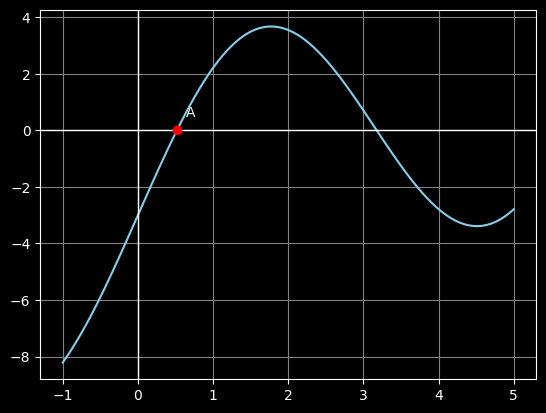

In [421]:
# Вывод полученного решения
print("Корень функции: \nx = ", m, "\nЗначение функции в этой точке: ", f(m))
# Построение графика с отмеченым решением
plt.plot(X, Y, color='skyblue') # График
# Оси координат
plt.axhline(0, color='white', linewidth=1)
plt.axvline(0, color='white', linewidth=1)

plt.scatter(m, 0, color='red', zorder=5) # Точка
plt.annotate('A', (m, 0), textcoords="offset points", xytext=(10,10), ha='center', zorder=5)
plt.grid(True, color='gray')
plt.show()

## Метод Ньютона(касательных)

**Суть метода:**

1. Строим касательную
   
2. Вычисляем точку пересечения касательной с осью абсцисс $x_{n+1} = x_{n} - \dfrac{f(x_{n})}{f'(x_{n})}$
   
3. Рассматриваем эту точку как новое приближение

4. Повторяем пока не достигли нужной точности

*Для работоспособности метода необходимо:*

1. Во всех промежуточных точках функция должна быть определена

2. Производная в этих точках отлична от нуля

3. Знакопостоянство $f'(x)$ и $f''(x)$ во всех точках

**Плюсы:**

1. Сходится за малое число итераций(сходится квадратично)

**Минусы:**

1. Может зацикливаться

2. Может вычислить не искомый корень(выйти за границы отрезка)

3. Необходимо знать значения первой производной в точках и поведение второй производной

4. Необходимо достаточно точное первое приближение

In [422]:
# Задайте первую производную функции
def df(x):
    return 5 * np.cos(x) + 1

In [423]:
m = (a + b) / 2 # <-- Здесь можно задать первое приближение

In [424]:
# Основной цикл
iter = 0
while (abs(f(m)) > epsilon) and (iter < max_iter): 
    # Переход по касательной
    try:
        m = m - f(m) / df(m)
    except:
        print("Метод не применим к данной функции")
        break

    iter += 1

if iter == max_iter:
    print("Превышено максимальное число итераций")
else:
    print("Число итераций: ", iter)

Число итераций:  4


Корень функции: 
x =  5.710299992436928 
Значение функции в этой точке:  5.25028166808994e-06


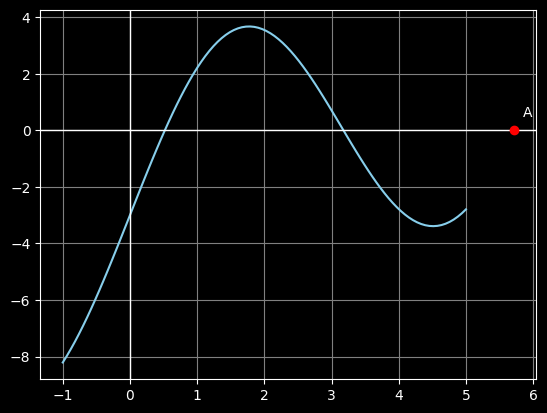

In [425]:
# Вывод полученного решения
print("Корень функции: \nx = ", m, "\nЗначение функции в этой точке: ", f(m))
# Построение графика с отмеченым решением
plt.plot(X, Y, color='skyblue') # График
# Оси координат
plt.axhline(0, color='white', linewidth=1)
plt.axvline(0, color='white', linewidth=1)

plt.scatter(m, 0, color='red', zorder=5) # Точка
plt.annotate('A', (m, 0), textcoords="offset points", xytext=(10,10), ha='center', zorder=5)
plt.grid(True, color='gray')
plt.show()

## Метод секущих

*Модификация метода касательных путем отказа вычисления производных*

**Суть метода:**

1. Строим касательную
   
2. Вычисляем точку пересечения секущей с осью абсцисс $\overline x_{n+1} = x_{n} - \dfrac{f(x_{n}) \cdot (x_{n} - x_{n-1})}{f(x_{n}) - f(x_{n-1})}$
   
3. Рассматриваем эту точку как новое приближение

4. Повторяем пока не достигли нужной точности

**Плюсы:**

1. Нет необходимости вычислять производную

**Минусы:**

1. Сниженая точность

In [426]:
# Здесь можно задать первое приближение
m0 = a
m = (a + b) / 2

In [427]:
# Основной цикл
iter = 0
while (abs(f(m)) > epsilon) and (iter < max_iter): 
    # Переход по секущей
    try:
        m0, m = m, m - f(m) * (m - m0) / (f(m) - f(m0))
    except:
        print("Метод не применим к данной функции")
        break

    iter += 1

if iter == max_iter:
    print("Превышено максимальное число итераций")
else:
    print("Число итераций: ", iter)

Число итераций:  4


Корень функции: 
x =  0.518143863121083 
Значение функции в этой точке:  -0.005513678635945762


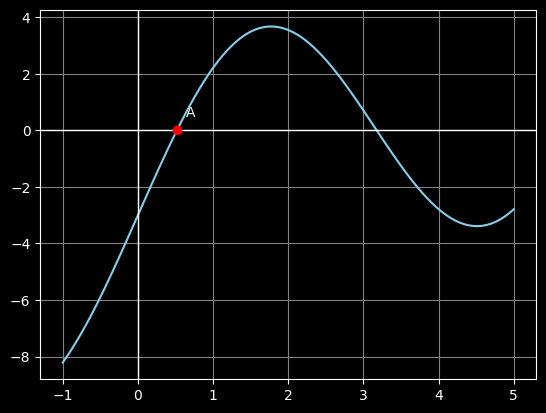

In [428]:
# Вывод полученного решения
print("Корень функции: \nx = ", m, "\nЗначение функции в этой точке: ", f(m))
# Построение графика с отмеченым решением
plt.plot(X, Y, color='skyblue') # График
# Оси координат
plt.axhline(0, color='white', linewidth=1)
plt.axvline(0, color='white', linewidth=1)

plt.scatter(m, 0, color='red', zorder=5) # Точка
plt.annotate('A', (m, 0), textcoords="offset points", xytext=(10,10), ha='center', zorder=5)
plt.grid(True, color='gray')
plt.show()

## Метод простых итераций(последовательных приближений)

*Основан на одномерной  дискретной динамической системе*

*Сходится к решению, если $\forall x \in [a, b] \implies |g'(x)| < 1$*

**Плюсы:**

1. Простота

**Минусы:**

1. Ограниченая применимость

In [429]:
# Задайте функцию ввиде x = g(x)
def g(x):
    return np.cos(x)

In [430]:
m0 = 2.5 # <-- Здесь можно задать первое приближение

In [431]:
# Основной цикл
iter = 0
m = m0
while (abs(g(m) - m) > epsilon) and (iter < max_iter): 
    try:
        m = g(m)
    except:
        print("Метод не применим к данной функции")
        break

    iter += 1

if iter == max_iter:
    print("Превышено максимальное число итераций")
else:
    print("Число итераций: ", iter)

Число итераций:  7


Корень функции: 
x =  0.7449723027635003 
Значение функции в этой точке:  0.009865622718543743


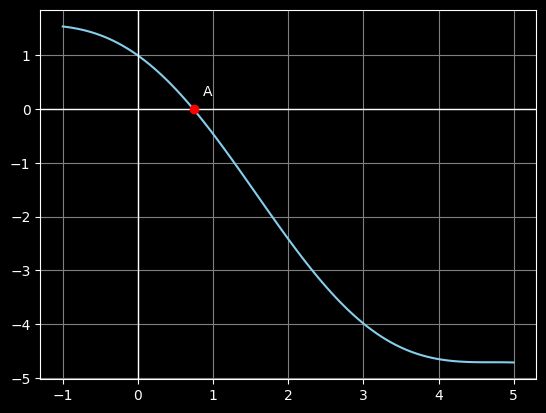

In [432]:
# Вывод полученного решения
print("Корень функции: \nx = ", m, "\nЗначение функции в этой точке: ", abs(g(m) - m))
# Построение графика с отмеченым решением
plt.plot(X, g(X) - X, color='skyblue') # График
# Оси координат
plt.axhline(0, color='white', linewidth=1)
plt.axvline(0, color='white', linewidth=1)

plt.scatter(m, 0, color='red', zorder=5) # Точка
plt.annotate('A', (m, 0), textcoords="offset points", xytext=(10,10), ha='center', zorder=5)
plt.grid(True, color='gray')
plt.show()

### Паутинная диаграмма

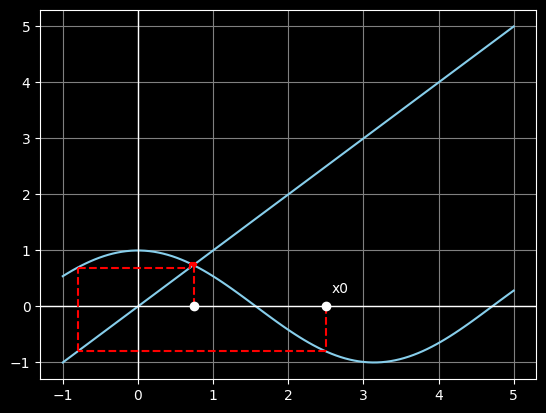

In [433]:
# Паутинная диаграмма
plt.plot(X, g(X), color='skyblue') # График
plt.plot(X, X, color='skyblue') # Биссектриса

x0 = m0
y0 = 0

plt.scatter(x0, 0, color='white', zorder=5) # Точка
plt.annotate('x0', (x0, 0), textcoords="offset points", xytext=(10,10), ha='center', zorder=5, color='white')

for _ in range(iter):
    plt.plot([x0, x0], [y0, g(x0)], 'r--', zorder=3)

    y0 = g(x0)

    plt.plot([x0, y0], [y0, y0], 'r--', zorder=3)

    x0 = g(x0)

plt.grid(True, color='gray')
# Оси координат
plt.axhline(0, color='white', linewidth=1)
plt.axvline(0, color='white', linewidth=1)

plt.plot([x0, x0], [x0, 0], 'r--', zorder=3)
plt.scatter(x0, 0, color='white', zorder=5) # Точка

plt.show()